In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >="0.20"
import numpy as np
import urllib
from pandas.plotting import scatter_matrix

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
#We look at the first 50 instances of the data set. Incidentally there are only 50.

dataset.head(50)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E8843FC88>,
      dtype=object)

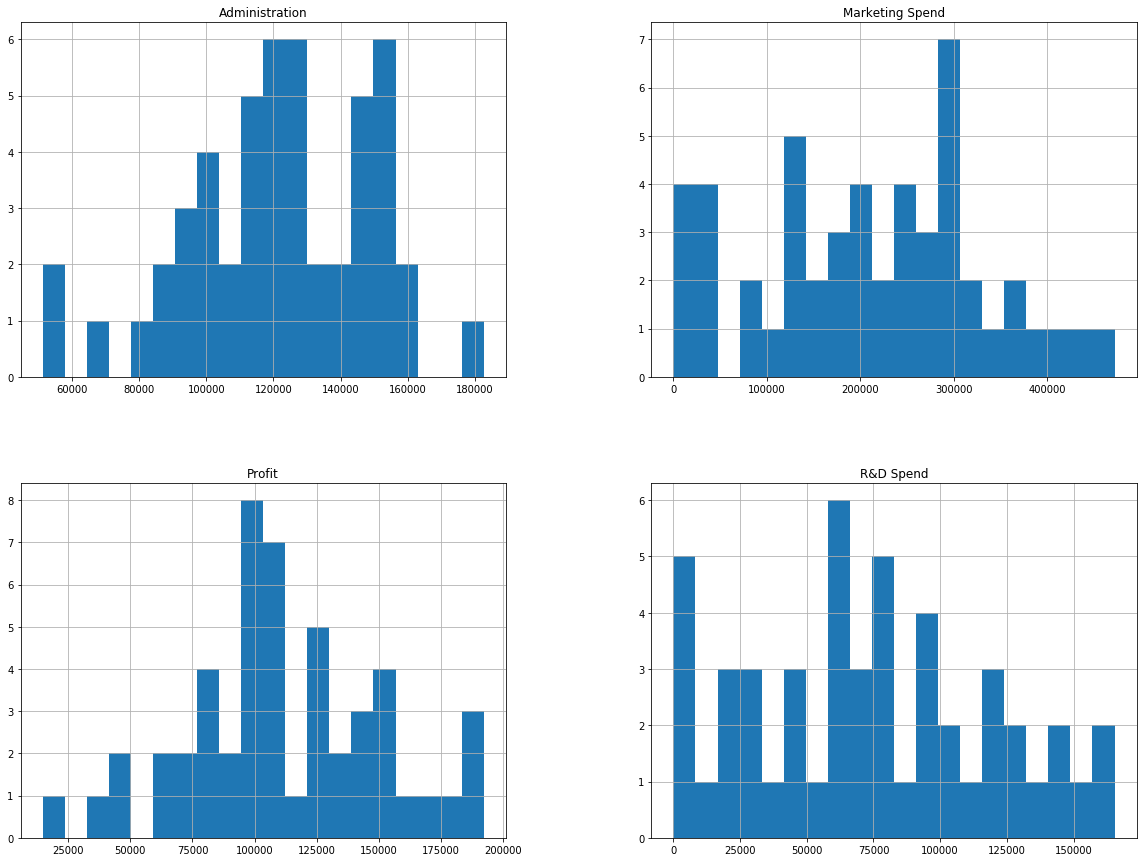

In [4]:
#We make a histogram for all the features in the data set.

dataset.hist(bins = 20, figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E89015748>,
      dtype=object)

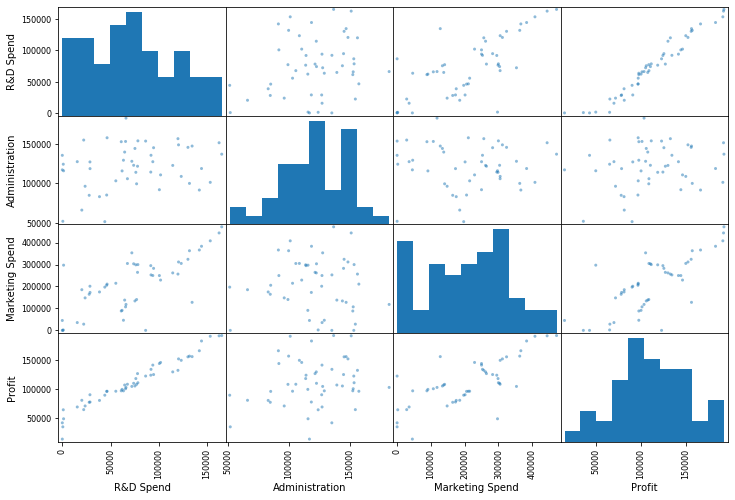

In [5]:
#Now we make scatter plots for all features against each other.

num_attributes = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
scatter_matrix(dataset[num_attributes], figsize = (12, 8))

Here we can see that R&D Spend correlates well to the profit. The scatter plot shows almost a straight line.

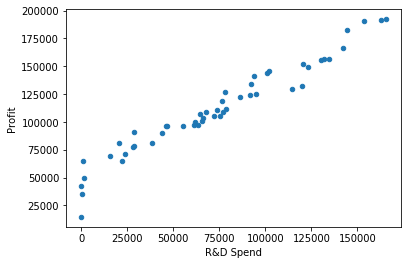

In [6]:
dataset.plot.scatter(x = "R&D Spend", y = "Profit")

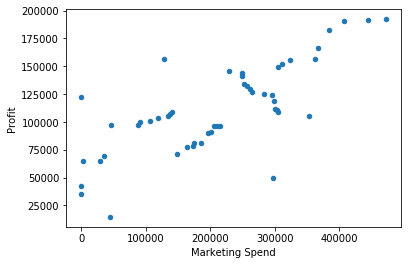

In [7]:
dataset.plot.scatter(x = "Marketing Spend", y = "Profit")

We also found Marketing Spend vs Profit interesting, as it looks like there are two lines that eventually becomes one.

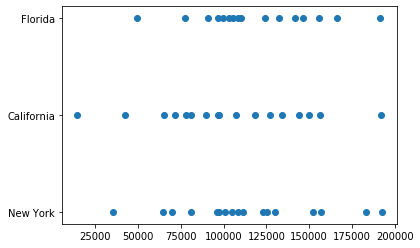

In [8]:
#Now we plot the State and the profit to see the correlations

plt.scatter(x=dataset.Profit, y=dataset.State)

Here we can see that there are no correlation between state and profit.

In [9]:
#Using the corr() method shows that we are right about the correlations.

dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
#We make a new combined feature of all the spendings. We also print the correlation sheet again.

dataset["general spending"] = dataset["R&D Spend"] + dataset["Marketing Spend"] + dataset["Administration"]

print(dataset["general spending"])
dataset.corr()

0     774031.10
1     757873.82
2     662521.60
3     646243.88
4     599667.53
5     594552.97
6     409531.15
7     599704.87
8     580874.76
9     536995.67
10    441668.14
11    442207.12
12    471023.57
13    480152.39
14    533003.58
15    498916.68
16    463956.72
17    522309.05
18    500844.52
19    239933.81
20    488785.63
21    531900.19
22    500096.57
23    478052.29
24    316900.16
25    342180.49
26    353514.92
27    553155.96
28    366845.28
29    325775.92
30    268767.00
31    302056.53
32    238713.72
33    373186.25
34    414917.66
35    336579.10
36    356846.79
37    292382.51
38    271442.62
39    296539.90
40    320096.05
41    277074.40
42    267831.67
43    178422.20
44    205318.60
45    127057.20
46    414246.13
47    135426.92
48     52285.20
49    162156.86
Name: general spending, dtype: float64


,R&D Spend,Administration,Marketing Spend,Profit,general spending
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.869663
Administration,0.241955,1.000000,-0.032154,0.200717,0.216674
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.952069
Profit,0.972900,0.200717,0.747766,1.000000,0.872598
general spending,0.869663,0.216674,0.952069,0.872598,1.000000


In [11]:
#We do the same with another feature minus Administration, as it doesn't correlate well with the profit alone.

dataset["general spending minus administration"] = dataset["R&D Spend"] + dataset["Marketing Spend"]
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,general spending,general spending minus administration
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.869663,0.847205
Administration,0.241955,1.000000,-0.032154,0.200717,0.216674,0.045199
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.952069,0.979916
Profit,0.972900,0.200717,0.747766,1.000000,0.872598,0.857488
general spending,0.869663,0.216674,0.952069,0.872598,1.000000,0.985040
general spending minus administration,0.847205,0.045199,0.979916,0.857488,0.985040,1.000000


We can see that the two new feature correlate well with the Profit, but it's not better than R&D Spend.

In [12]:
#We remove the new combined features from the data set

dataset = dataset.drop("general spending", axis = 1)
dataset = dataset.drop("general spending minus administration", axis = 1)

In [13]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [14]:
#We make a stratified split on the data set based on State.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(dataset, dataset["State"]): 
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]


In [15]:
strat_train_set

,R&D Spend,Administration,Marketing Spend,State,Profit
11,100671.96,91790.61,249744.55,California,144259.40
8,120542.52,148718.95,311613.29,New York,152211.77
34,46426.07,157693.92,210797.67,California,96712.80
1,162597.70,151377.59,443898.53,California,191792.06
19,86419.70,153514.11,0.00,New York,122776.86
10,101913.08,110594.11,229160.95,Florida,146121.95
0,165349.20,136897.80,471784.10,New York,192261.83
48,542.05,51743.15,0.00,New York,35673.41
23,67532.53,105751.03,304768.73,Florida,108733.99
17,94657.16,145077.58,282574.31,New York,125370.37


In [16]:
#Making a copy of the training set without the label, a copy of the label and a copy of the test set.

train_set = strat_train_set.drop("Profit", axis=1)
train_set_labels = strat_train_set["Profit"].copy()
test_set = strat_test_set

In [17]:
#removing the features

train_set = train_set.drop("State", axis = 1)
train_set = train_set.drop("Administration", axis = 1)

train_set

,R&D Spend,Marketing Spend
11,100671.96,249744.55
8,120542.52,311613.29
34,46426.07,210797.67
1,162597.70,443898.53
19,86419.70,0.00
10,101913.08,229160.95
0,165349.20,471784.10
48,542.05,0.00
23,67532.53,304768.73
17,94657.16,282574.31


We have removed the features with very low correlation to the profit.

In [18]:
#we fit and transform the model

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

train_set_prepared = pipeline.fit_transform(train_set)
train_set_prepared

array([[ 5.07486133e-01,  2.78073612e-01],
       [ 9.34470740e-01,  7.92671307e-01],
       [-6.58165969e-01, -4.58698642e-02],
       [ 1.83816518e+00,  1.89296331e+00],
       [ 2.01229257e-01, -1.79919465e+00],
       [ 5.34155695e-01,  1.06868038e-01],
       [ 1.89729024e+00,  2.12490354e+00],
       [-1.64413568e+00, -1.79919465e+00],
       [-2.04623968e-01,  7.35741187e-01],
       [ 3.78238291e-01,  5.51137502e-01],
       [ 1.17802733e+00,  1.21893082e+00],
       [-1.05641190e+00, -4.31197686e-01],
       [-4.63312619e-01, -1.39541762e-02],
       [ 3.20976906e-01,  3.02364082e-01],
       [ 1.64141419e+00,  1.59383023e+00],
       [-6.67020224e-01, -8.97868935e-02],
       [ 9.94473817e-01,  7.37511915e-01],
       [-1.14777995e+00, -5.68184769e-01],
       [-2.38407346e-04, -6.29953553e-01],
       [-1.62751641e+00,  6.72076245e-01],
       [-2.46033002e-01, -9.08063465e-01],
       [-3.70938548e-02, -6.84223548e-01],
       [-1.32259159e+00, -1.50363663e+00],
       [-1.

The only transformation we use is to remove some of the features. There are no missing values and we remove State that could have been tranformed into a numerical value if it was useful.

In [19]:
#training a linear regression model on the finished training set.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_prepared, train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#Making predictions
from sklearn.metrics import r2_score, mean_squared_error

train_set_predictions = lin_reg.predict(train_set_prepared)

some_data = train_set.iloc[:9]
some_labels = train_set_labels.iloc[:9]
some_data_prepared = pipeline.transform(some_data)

train_set_some_predictions = lin_reg.predict(some_data_prepared)

print("predictions:", train_set_some_predictions)
print("labels:", list(some_labels))

print("R2 score for the features: "+str(r2_score(some_labels, train_set_some_predictions)))
print('Coefficients for the features: ', lin_reg.coef_)

predictions: [134497.35126418 152828.72714942  89792.28271307 191681.45469676
 112911.80113486 134637.92602335 195013.49546234  44671.50611827
 110424.60877603]
labels: [144259.4, 152211.77, 96712.8, 191792.06, 122776.86, 146121.95, 192261.83, 35673.41, 108733.99]
R2 score for the features: 0.9757156844822835
Coefficients for the features:  [36979.29539597  4939.36524022]


We can see that the predictions are not perfect, but still not too bad.

In [21]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(some_labels, train_set_some_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7181.6262954061185

In [22]:
#scores for the linear regression model.
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, train_set_prepared, train_set_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 6324.33544056  9946.79938417  5613.23511992  7128.77849822
  5998.79649383 11070.35831205  7942.91798478 19413.9742687
  4848.25760659 10731.84047922]
Mean: 8901.92935880341
Standard deviation: 4074.6681152229007


In [23]:
#the model that will be used to predict. is it already trained?
final_lin_reg_model = lin_reg

#variables for the test set
X_test = strat_test_set.drop("Profit", axis=1)
X_test = strat_test_set.drop("State", axis = 1)
X_test = strat_test_set.drop("Administration", axis = 1)

Y_test = strat_test_set["Profit"].copy()

Y_test

4     166187.94
37     89949.14
31     97483.56
44     65200.33
40     78239.91
45     64926.08
27    105008.31
12    141585.52
25    107404.34
22    110352.25
Name: Profit, dtype: float64

In [24]:
#using the full transform pipeline on the test set (not fit that will train it)
X_test_prepared = pipeline.transform(X_test)

final_predictions = final_lin_reg_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: could not convert string to float: 'Florida'

#We turn the state strings into a numerical value.
num_state = strat_train_set['State'].apply(lambda x:int(x.replace("New York","1").replace("Florida", "2").replace("California", "3")))

num_state

#converting the categorical values to numbers
from sklearn.preprocessing import OrdinalEncoder 

train_set_state = strat_train_set["State"].copy()

ordinal_encoder = OrdinalEncoder()
state_cat_encoded = ([-1, 1])
state_cat_encoded
state_cat_encoded = ordinal_encoder.fit_transform(train_set_state)

state_cat_encoded[:10] #the first 10 indexes.

transformations
- flatten / categorical into numerical
- fit / transform
- feature selection 



- missing values = none